### 4) The sinking of the Titanic is one of the most infamous shipwrecks in history.
On April 15, 1912, during her maiden voyage, the Titanic sank after colliding
with an iceberg, killing 1502 out of 2224 passengers and crew. This
sensational tragedy shocked the international community and led to better
safety regulations for ships.
One of the reasons that the shipwreck led to such a loss of life was that there
were not enough lifeboats for the passengers and crew. Although there was
some element of luck involved in surviving the sinking, some groups of
people were more likely to survive than others, such as women, children, and
the upper-class.
Develop an ML model to predict the survival of passengers.
(Use titanic.csv file)

In [62]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [42]:
data = pd.read_csv('titanic.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


##### * Age contains missing value - Impute using mean 

In [43]:
#data['Age']
data["Age"] = data["Age"].fillna(data["Age"].mean())

In [44]:
data = data.as_matrix()

In [50]:


y = data[:,1]

X = data[:,[2,4,5]]

np.shape(X)


(891, 3)

#####  * Apply Encoding on sex column (label encoding)

In [51]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(data[:,4])

encoded_sex = le.transform(X[:,1])

X[:,1] = encoded_sex

np.shape(y)

(891,)

## * (https://stackoverflow.com/questions/45346550/valueerror-unknown-label-type-unknown)
#### Your y is of type object, so sklearn cannot recognize its type. Add the line y=y.astype('int')

In [60]:
y=y.astype('int')

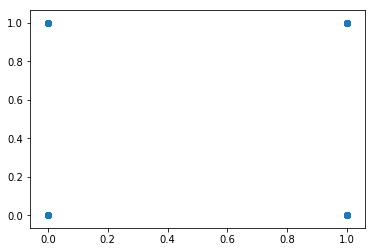

             precision    recall  f1-score   support

          0       0.82      0.86      0.84       549
          1       0.76      0.69      0.72       342

avg / total       0.79      0.80      0.79       891

[[474  75]
 [106 236]]


In [63]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix


model = LogisticRegression()
model.fit(X,y)
p = model.predict(X)

plt.scatter(y,p)
plt.show()
print classification_report(y,p)
print confusion_matrix(y,p)